In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, ttest_ind

In [2]:
# Get dataframe
df = pd.read_csv('data/processed_data.csv')
print(df.head())

# Column names of interes
prs_types = ['GM', 'WM', 'FC']
prs_cols = ['{}_SCORE'.format(prs_type) for prs_type in prs_types] + \
           ['{}_ZSCORE'.format(prs_type) for prs_type in prs_types]
genetics = ['APOEGN']
amyloid = ['Amyloid']
factors = [col for col in df.columns if col not in ['IID'] + prs_cols + genetics + amyloid]

         IID  GM_SCORE  GM_ZSCORE  WM_SCORE  WM_ZSCORE  FC_SCORE  FC_ZSCORE  \
0  B32512144  0.000449   0.485442  0.000346   0.274337 -0.000026   0.489272   
1  B11816003  0.000047  -0.088311  0.001022   1.094869 -0.000368   0.112118   
2  B69547090  0.001152   1.491210  0.000323   0.245619  0.000650   1.236953   
3  B87467726 -0.000271  -0.543868 -0.000979  -1.335242 -0.000064   0.447456   
4  B92485577 -0.000489  -0.854842  0.000161   0.048866 -0.001789  -1.458315   

   pTau217  FCTOTAL96    BP40  ...   TP42  TP42/TP40  AMYLB40  AMYLB42  APOE4  \
0      NaN       82.0   74.71  ...  11.01      0.081    0.193    19.88    NaN   
1      NaN       74.0  172.13  ...  83.66      0.234    0.263    28.73  11.86   
2    0.157       79.0   64.90  ...   9.62      0.074    0.219    22.48    NaN   
3    0.242       87.0   64.54  ...  25.10      0.217    0.212    20.01   5.90   
4    0.304       77.0  115.53  ...  18.56      0.073    0.325    31.26  18.82   

   GFAP   NF-L   TPP181   Amyloid  APO

## Basic data analysis

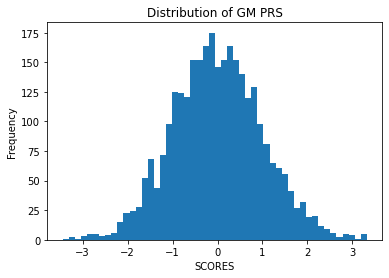

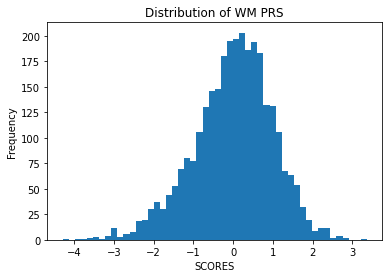

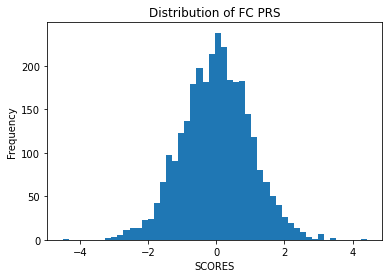

In [3]:
# Show distributions of ZSCORES for each prs type
for prs_type in prs_types:
    plt.hist(df['{}_ZSCORE'.format(prs_type)], bins=50)
    plt.title('Distribution of {} PRS'.format(prs_type))
    plt.xlabel('SCORES')
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# Calculate Pearson correlation between PRS and different values
df_factors = pd.DataFrame(columns=['Factor']+ [prs + '_corr' for prs in prs_types]
                          + [prs + '_pval' for prs in prs_types])
for factor in factors:
    # Create new empty row for factor
    row = {'Factor': factor}
    for prs in prs_types:
        df_p = df[['{}_ZSCORE'.format(prs), factor]].copy().dropna()
        corr, p_val = pearsonr(df_p['{}_ZSCORE'.format(prs)], df_p[factor])
        row[prs+'_corr'], row[prs+'_pval'] = corr, p_val
    df_factors = pd.concat([df_factors, pd.DataFrame([row])], ignore_index=True)

# Show results
print(df_factors)

# Obtain which factors have p_val < 0.05
for prs in prs_types:
    print('Factors with p_val < 0.05 for {} PRS:'.format(prs))
    factors = df_factors[df_factors[prs+'_pval'] < 0.05]['Factor'].to_list()
    for factor in factors:
        print("Factor: {}, Correlation: {}, p_val: {}".format(factor, 
                                                              df_factors[df_factors['Factor'] == factor][prs+'_corr'].values[0], 
                                                              df_factors[df_factors['Factor'] == factor][prs+'_pval'].values[0]))

       Factor   GM_corr   WM_corr   FC_corr   GM_pval   WM_pval   FC_pval
0     pTau217  0.055725 -0.016918 -0.040871  0.130942  0.646781  0.268129
1   FCTOTAL96  0.038819   0.02291 -0.028694  0.033199  0.208907  0.115503
2        BP40  0.010867   -0.0071 -0.019471  0.581726  0.718918  0.323602
3        BP42 -0.002056  -0.01871 -0.041425  0.920143  0.361563  0.043305
4        FP40  0.026181  0.003043 -0.012208   0.18202  0.876752  0.533796
5   FP40/TP40 -0.008666  0.005969 -0.008674  0.659768  0.761723  0.659485
6        FP42  0.010712 -0.003421 -0.022188  0.597328  0.866049  0.273852
7   FP42/FP40  0.007732 -0.001948 -0.016977  0.703294  0.923559   0.40296
8   FP42/TP42 -0.019014  0.023904  -0.01947  0.352017  0.241957  0.340567
9        TP40   0.01464 -0.009015 -0.021949  0.456263  0.646412  0.263969
10       TP42   0.00077 -0.019042 -0.040201  0.969367  0.342017  0.044787
11  TP42/TP40  0.009784  0.035876 -0.008507  0.626133  0.073939  0.671852
12    AMYLB40   0.03467  0.014436 -0.0

## Seperate by status

Mean GM PRS for positive amyloid status: -0.005237483552048212
Mean GM PRS for negative amyloid status: 0.0023664545143640935
T-test for GM PRS: t_stat: -0.1932469512022894, p_val: 0.8467785995867741


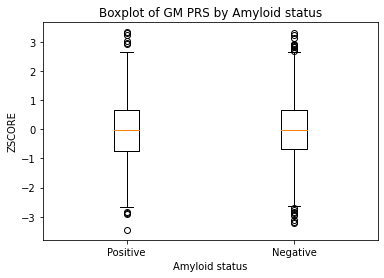

Mean WM PRS for positive amyloid status: 0.014297174403265793
Mean WM PRS for negative amyloid status: -0.006459898646561842
T-test for WM PRS: t_stat: 0.5275426351547571, p_val: 0.5978556734292113


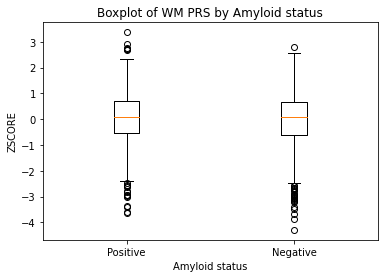

Mean FC PRS for positive amyloid status: 0.04112724981239809
Mean FC PRS for negative amyloid status: -0.018582543508683366
T-test for FC PRS: t_stat: 1.518039348036214, p_val: 0.12910942792100788


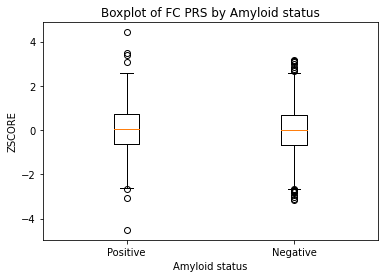

In [5]:
# Obtaain subject by amyloid status
df_pos = df[df['Amyloid'] == 'positive']
df_neg = df[df['Amyloid'] == 'negative']

# Plot boxplots for each PRS type for each status
for prs in prs_types:
    # Obtain prs
    pos_prs = df_pos['{}_ZSCORE'.format(prs)].dropna().to_numpy()
    neg_prs = df_neg['{}_ZSCORE'.format(prs)].dropna().to_numpy()
    print('Mean {} PRS for positive amyloid status: {}'.format(prs, pos_prs.mean()))
    print('Mean {} PRS for negative amyloid status: {}'.format(prs, neg_prs.mean()))

    # Caclulate t-test
    t_stat, p_val = ttest_ind(pos_prs, neg_prs)
    print('T-test for {} PRS: t_stat: {}, p_val: {}'.format(prs, t_stat, p_val))

    # Plot boxplot
    plt.boxplot([pos_prs, neg_prs])
    plt.title('Boxplot of {} PRS by Amyloid status'.format(prs))
    plt.xlabel('Amyloid status')
    plt.ylabel('ZSCORE')
    plt.xticks([1, 2], ['Positive', 'Negative'])
    plt.show()

Number of subjects with genotype E3/E3: 3013
Number of subjects with genotype E3/E4: 1589
Number of subjects with genotype E2/E3: 559
Number of subjects with genotype E4/E4: 167
Number of subjects with genotype E2/E4: 132
Number of subjects with genotype E2/E2: 29
Mean GM PRS for E3/E3 genotype: 0.024121074437054628
Mean GM PRS for E3/E4 genotype: -0.019945359733992727
Mean GM PRS for E2/E3 genotype: -0.04822265223473442
Mean GM PRS for E4/E4 genotype: -0.04260298611651375
Mean GM PRS for E2/E4 genotype: -0.058596416983119314
Mean GM PRS for E2/E2 genotype: 0.0009885154822961363


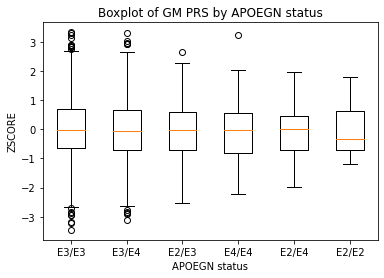

Mean WM PRS for E3/E3 genotype: -0.013517549645328189
Mean WM PRS for E3/E4 genotype: 0.040481693497962226
Mean WM PRS for E2/E3 genotype: 0.01467781858065084
Mean WM PRS for E4/E4 genotype: -0.15318698807209674
Mean WM PRS for E2/E4 genotype: -0.06021329263543765
Mean WM PRS for E2/E2 genotype: 0.3052797364457275


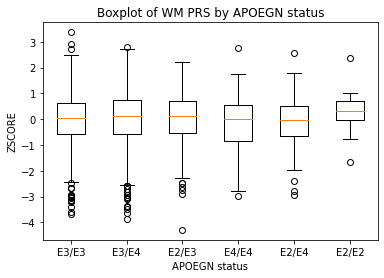

Mean FC PRS for E3/E3 genotype: -0.033912011304124266
Mean FC PRS for E3/E4 genotype: 0.02643681362988799
Mean FC PRS for E2/E3 genotype: 0.07890773888362425
Mean FC PRS for E4/E4 genotype: -0.02274738590092682
Mean FC PRS for E2/E4 genotype: 0.07711975233966537
Mean FC PRS for E2/E2 genotype: 0.1530009012417316


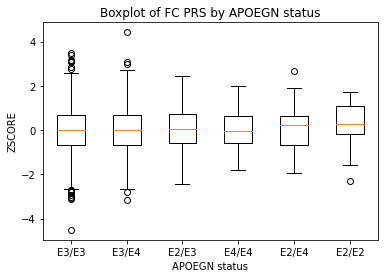

In [6]:
# Divide by type of gen
gen_types = df['APOEGN'].copy().dropna().unique()
# NUmber of subjects for each genotype
for gen in gen_types:
    print('Number of subjects with genotype {}: {}'.format(gen, df[df['APOEGN'] == gen].shape[0]))
for prs in prs_types:
    # Get PRS for each genotype
    gen_dict = {}
    for gen in gen_types:
        gen_prs = df[df['APOEGN'] == gen]['{}_ZSCORE'.format(prs)].dropna().to_numpy()
        gen_dict[gen] = gen_prs
        print('Mean {} PRS for {} genotype: {}'.format(prs, gen, gen_prs.mean()))
    # Plot boxplots
    plt.boxplot([gen_dict[gen] for gen in gen_types])
    plt.title('Boxplot of {} PRS by APOEGN status'.format(prs))
    plt.xlabel('APOEGN status')
    plt.ylabel('ZSCORE')
    plt.xticks(range(1, len(gen_types)+1), gen_types)
    plt.show()


Number of subjects with E4 allele: 1888
Number of subjects without E4 allele: 3601
Mean GM PRS for No E4 E4 status: 0.013002786035157705
Mean GM PRS for E4 E4 status: -0.024821540242304218


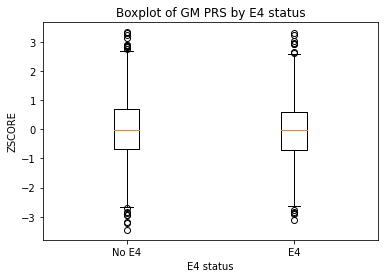

Mean WM PRS for No E4 E4 status: -0.007080234334608421
Mean WM PRS for E4 E4 status: 0.015253431089331821


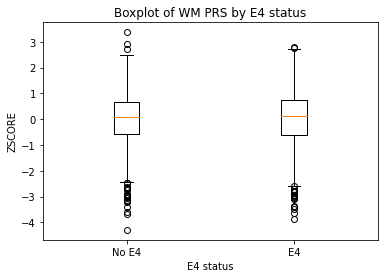

Mean FC PRS for No E4 E4 status: -0.015548586321081841
Mean FC PRS for E4 E4 status: 0.025491852074140436


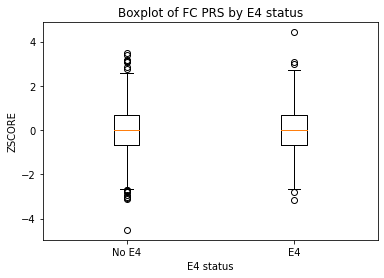

In [7]:
# Contains E4 allele vs does not contain E4 allele
df_e4 = df.copy()
df_e4['E4'] = df['APOEGN'].dropna().apply(lambda x: 'E4' if 'E4' in x else 'No E4')
e4_types = df_e4['E4'].dropna().unique()
print('Number of subjects with E4 allele: {}'.format(df_e4[df_e4['E4'] == 'E4'].shape[0]))
print('Number of subjects without E4 allele: {}'.format(df_e4[df_e4['E4'] == 'No E4'].shape[0]))
for prs in prs_types:
    # Get PRS for each genotype
    e4_dict = {}
    for e4 in e4_types:
        e4_prs = df_e4[df_e4['E4'] == e4]['{}_ZSCORE'.format(prs)].dropna().to_numpy()
        e4_dict[e4] = e4_prs
        print('Mean {} PRS for {} E4 status: {}'.format(prs, e4, e4_prs.mean()))
    # Plot boxplots
    plt.boxplot([e4_dict[e4] for e4 in e4_types])
    plt.title('Boxplot of {} PRS by E4 status'.format(prs))
    plt.xlabel('E4 status')
    plt.ylabel('ZSCORE')
    plt.xticks(range(1, len(e4_types)+1), e4_types)
    plt.show()